In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [4]:
def getData(n_points):
    # Generate 2D Data
    # Coefficients of the quadratic function, y(x) = ax^2 + bx + c:
    a = 2
    b = 5
    c = 7

    # x ranges from -10 to 10
    # y is the quadratic function of x specified by a, b, and c, plus noise
    x = np.linspace(-10, 10, num = n_points)                
    # y = a*x**2 + b*x + c + 15* np.random.randn(n_points)
    y = a*x* + c + 50* np.random.randn(n_points)
    return x, y

def split_train_test(x, y, n_train_points):
    n_points = x.shape[0]
    # Get Train data
    train_indices = np.random.choice(n_points, size=n_train_points, replace=False)
    train_indices = np.sort(train_indices)
    x_train = x[train_indices]
    y_train = y[train_indices]

    # Get test data
    x_test = np.delete(x, train_indices)
    y_test = np.delete(y, train_indices)

    return x_train, y_train, x_test, y_test

In [5]:
class Regression:
    def __init__(self, degree):
        """
        Initialize a Regression instance.

        :param degree: Degree of the polynomial regression.
        """
        self.degree_ = degree

    def fit(self, x_train, y_train):
        """
        Fit the polynomial regression model to the training data.

        :param x_train: Input features for training.
        :param y_train: Target values for training.
        """
        self.coefficients_ = np.polyfit(x_train, y_train, self.degree_)
    
    def predict(self, x):
        """
        Predict target values using the fitted regression model.

        :param x: Input features for prediction.
        :return: Predicted target values.
        """
        return np.polyval(self.coefficients_, x)

In [6]:
class Metrics:
    @staticmethod
    def computeBias(y, y_pred):
        bias = (y - y_pred)**2
        mean_bias = np.mean(bias)
        return bias, mean_bias

    @staticmethod
    def computeVariance(y, y_pred):
        variance = (y_pred - np.mean(y_pred))
        mean_variance = np.mean(variance**2)
        return variance, mean_variance

    @staticmethod
    def computeRMSE(y, y_pred):
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        return rmse

In [7]:
class TrainUtility:
    def __init__(self, x, y, degree):
        self.x_ = x
        self.y_ = y
        self.degree_ = degree
        self.model_ = Regression(self.degree_)

    def runOnce(self, n_train_points):
        # Fit polynomial to the data
        self.x_train_, self.y_train_, self.x_test_, self.y_test_ = split_train_test(self.x_, self.y_, n_train_points)
        self.model_.fit(self.x_train_, self.y_train_)

        y_pred = self.model_.predict(self.x_)
        return y_pred

    def computeMetrics(self):
        y_train_pred = self.model_.predict(self.x_train_)
        y_test_pred = self.model_.predict(self.x_test_)
        
        # Compute metrics 
        self.train_RMSE_ = Metrics.computeRMSE(self.y_train_, y_train_pred)
        self.test_RMSE_ = Metrics.computeRMSE(self.y_test_, y_test_pred)
        return

    def plotModel(self, x, y_pred, figure_num=0, alpha=1):
        plt.figure(figure_num)
        plt.plot(x, y_pred, color = TRAIN_COLOR, linewidth = 2, alpha=alpha)
        return

    def plotMetrics(self, figure_num=0):
        plt.figure(figure_num)
        plt.text(0.80, 0.02, f'RMSE: ', fontsize=11,
            ha='right', va='bottom', transform=plt.gca().transAxes, color='black')

        plt.text(0.87, 0.02, f'{self.train_RMSE_:.2f}', fontsize=11,
            ha='right', va='bottom', transform=plt.gca().transAxes, color=TRAIN_COLOR)

        plt.text(0.89, 0.02, f'|', fontsize=11,
            ha='right', va='bottom', transform=plt.gca().transAxes, color='black')

        plt.text(0.98, 0.02, f'{self.test_RMSE_:.2f}', fontsize=11,
            ha='right', va='bottom', transform=plt.gca().transAxes, color=TEST_COLOR)
        return


    def plotData(self, figure_num=0):
        plt.figure(figure_num)
        plt.plot(self.x_test_, self.y_test_, marker = 'o', color = TEST_COLOR, linewidth = 0)
        plt.plot(self.x_train_, self.y_train_, marker = 'x', color = TRAIN_COLOR, linewidth = 0)

        plt.legend(['Test Samples', 'Train Samples'], loc = 'best')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Regression with degree '+f'{self.degree_}')
        return 

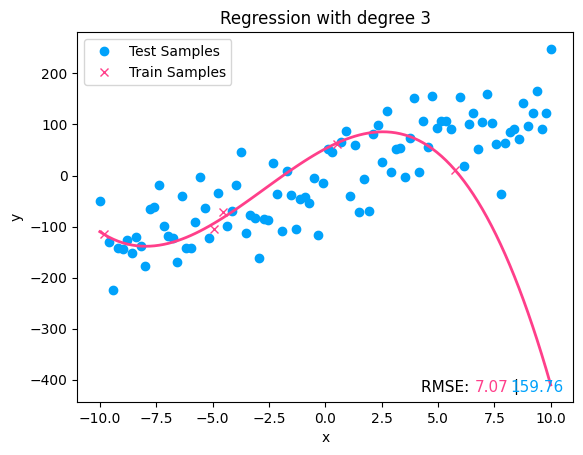

In [8]:
# Seed for random number generation
np.random.seed(3)

# Define colors
TEST_COLOR = "#00A2FB"
TRAIN_COLOR = "#FF3F8A"

# Get data
n_points = 100
x, y = getData(n_points)
trainer = TrainUtility(x, y, degree=3) 
y_pred = trainer.runOnce(n_train_points=5)
trainer.computeMetrics()
trainer.plotData()
trainer.plotModel(x, y_pred)
trainer.plotMetrics()


# # Print metrics
# print(f"Bias: {mean_bias:.2f}")
# print(f"Variance: {mean_variance:.2f}")
# print(f"train_RMSE: {train_RMSE:.2f}")
# print(f"test_RMSE: {test_RMSE:.2f}")

In [9]:
def biasVarianceTradeOff(iterations=10, degree=1, n_train_points=10):
    # Get data
    x, y = getData(n_points)
    trainer = TrainUtility(x, y, degree=degree) 

    predictions = []
    iter = 0
    seed_iter = 0
    while (iter < iterations):
        np.random.seed(seed_iter)
        y_pred = trainer.runOnce(n_train_points)
        trainer.plotData()
        threshold = 500
        if (np.max(y_pred) < threshold and np.min(y_pred) > -threshold):
            trainer.plotModel(x, y_pred, figure_num=0, alpha=0.05)
            predictions.append(y_pred)
            iter += 1 

        seed_iter += 1

        # BIAS.append(bias)
        # VARIANCE.append(variance)

    plt.figure(0)
    plt.plot(x, np.mean(predictions, axis=0), color='b')

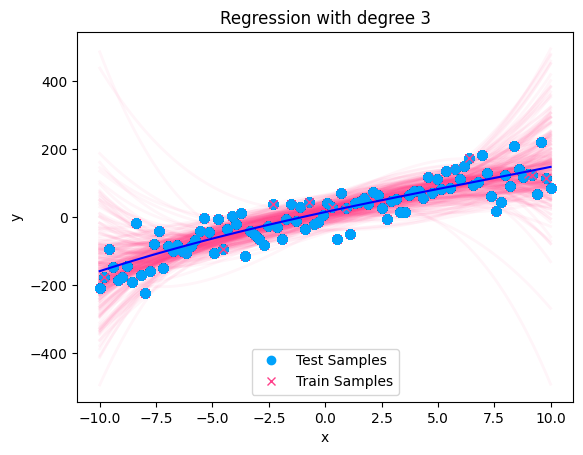

In [10]:
biasVarianceTradeOff(iterations=300, degree=3, n_train_points=10)